In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
    'data/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import optimizers

In [8]:
"""model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))"""

"model = Sequential()\n\nmodel.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))\nmodel.add(Conv2D(180,kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPool2D(5,5))\nmodel.add(Conv2D(180,kernel_size=(3,3),activation='relu'))\nmodel.add(Conv2D(140,kernel_size=(3,3),activation='relu'))\nmodel.add(Conv2D(100,kernel_size=(3,3),activation='relu'))\nmodel.add(Conv2D(50,kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPool2D(5,5))\nmodel.add(Flatten())\nmodel.add(Dense(180,activation='relu'))\nmodel.add(Dense(100,activation='relu'))\nmodel.add(Dense(50,activation='relu'))\nmodel.add(Dropout(rate=0.5))\nmodel.add(Dense(6,activation='softmax'))"

In [9]:
model = Sequential()

model.add(Conv2D(72, (3,3), padding='same', input_shape=(150, 150, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(5, 5)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(5, 5)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=0.0001), 
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 72)      2016      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 64)      41536     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 48)        27696     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        13856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 24)        6936      
__________

In [12]:
trained = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10/10 [==============================] - 32s 3s/step - loss: 1.7928 - acc: 0.1406 - val_loss: 1.7882 - val_acc: 0.1667
Epoch 2/20
10/10 [==============================] - 35s 3s/step - loss: 1.7891 - acc: 0.1719 - val_loss: 1.7856 - val_acc: 0.1771
Epoch 3/20
10/10 [==============================] - 33s 3s/step - loss: 1.7909 - acc: 0.1687 - val_loss: 1.7831 - val_acc: 0.2917
Epoch 4/20
10/10 [==============================] - 33s 3s/step - loss: 1.7832 - acc: 0.2156 - val_loss: 1.7771 - val_acc: 0.2188
Epoch 5/20
10/10 [==============================] - 33s 3s/step - loss: 1.7754 - acc: 0.2344 - val_loss: 1.7710 - val_acc: 0.1771
Epoch 6/20
10/10 [==============================] - 35s 3s/step - loss: 1.7663 - acc: 0.2188 - val_loss: 1.7548 - val_acc: 0.2083
Epoch 7/20
10/10 [==============================] - 33s 3s/step - loss: 1.7443 - acc: 0.2594 - val_loss: 1.7207 - val_acc: 0.3333
Epoch 8/20
10/10 [========================

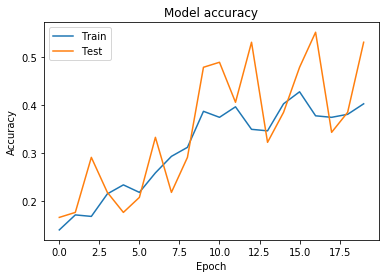

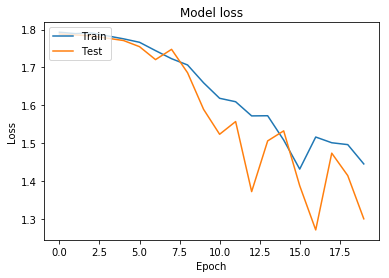

In [13]:
plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()